In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [26]:
# Read in the netcdf file for SMB

ds = nc.Dataset('IRH_Data/Derwael_SMB_Combined_IceEquiv.nc')
#smb_old = np.array(ds.variables['smb'][:], dtype=type(ds.variables))
smb_before_adjustment = np.array(ds.variables['smb'][:])
X = np.array(ds.variables['x'][:])
Y = np.array(ds.variables['y'][:])
smb_before_adjustment.shape, len(X), len(Y)
smb_before_adjustment = smb_before_adjustment.T
smb_before_adjustment.shape, len(X), len(Y)

((178, 159), 178, 159)

In [15]:
# Read in the csv file with dsdt
data = {}
Sims = ['n3E0.4Time50', 'n3E0.4Time100', 'n3E0.4Time150', 'n3E0.5Time50', 'n3E0.5Time100', 'n3E0.5Time150', 'n3E0.6Time50', 'n3E0.6Time100', 'n3E0.6Time150', 'n4E1.8Time50', 'n4E1.8Time100', 'n4E1.8Time150']  

for i in range(len(Sims)):
    data[Sims[i]] = pd.read_csv('../Simulations/DerwaelSimulations/dsdt_adjustment/' + Sims[i] + '.csv', sep=",")


In [16]:
# Interpolate dsdt data onto a meshgrid the same shape as the netcdf file

dsdt = {}

grid_x, grid_y = np.mgrid[min(X):max(X):178j, min(Y):max(Y):159j]

for i in range(len(Sims)):
    dsdt[Sims[i]] = scipy.interpolate.griddata((data[Sims[i]]["Points:0"], data[Sims[i]]["Points:1"]), data[Sims[i]]["dsdt"], (grid_x, grid_y), method='linear')


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9213/1315389753.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


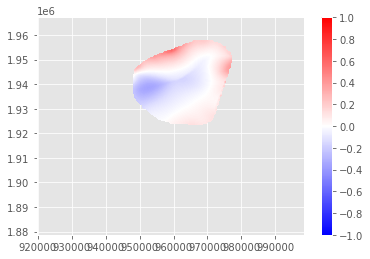

In [17]:
# Plot the dsdt field

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x, grid_y, dsdt['n3E0.4Time50'], levels=np.linspace(-1.0,1.0,500), cmap='bwr')
fig.colorbar(CS, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9213/894008132.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


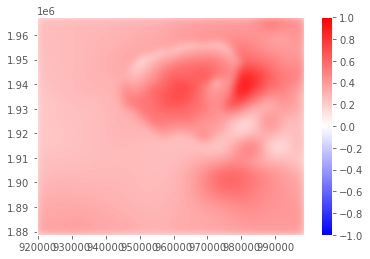

In [18]:
# Plot the previous smb field

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x, grid_y, smb_before_adjustment, levels=np.linspace(-1.0,1.0,500), cmap='bwr')
fig.colorbar(CS, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])



/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9213/3615798692.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


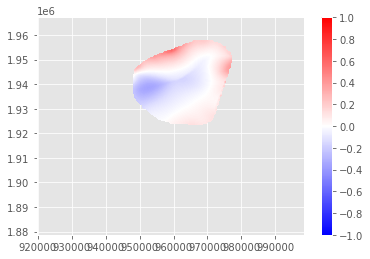

In [19]:
# Plot the dsdt field after elimination of ice shelf

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x, grid_y,dsdt['n3E0.4Time50'], levels=np.linspace(-1.0,1.0,500), cmap='bwr')
fig.colorbar(CS, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


In [20]:
# Make the dsdt adjustment for all simulations

for i in range(len(Sims)):
    dsdt[Sims[i]] = smb_before_adjustment - dsdt[Sims[i]]
    dsdt[Sims[i]][np.isnan(dsdt[Sims[i]])] = smb_before_adjustment[np.isnan(dsdt[Sims[i]])]


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9213/3512668950.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, ticks=[-1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])


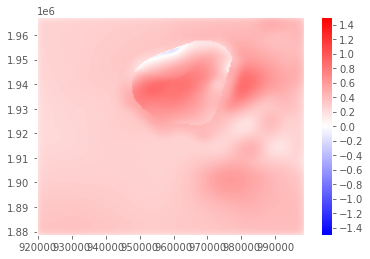

In [21]:
# Plot the new smb field

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x, grid_y, dsdt['n3E0.4Time50'], levels=np.linspace(-1.5,1.5,500), cmap='bwr')
fig.colorbar(CS, ticks=[-1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])



In [22]:
# Apply a Gaussian filter to smooth the transition

Smoothed = {}

sigma_x = 1.5
sigma_y = 1.5

sigma = [sigma_x, sigma_y]

for i in range(len(Sims)):
    Smoothed[Sims[i]] = sp.ndimage.gaussian_filter(dsdt[Sims[i]], sigma, mode='constant')


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_9213/1288873410.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(CS, ticks=[-1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])


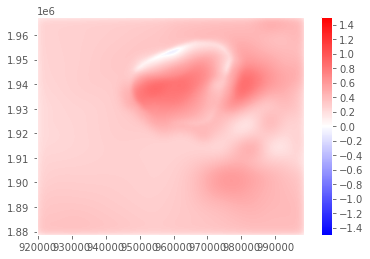

In [23]:
# Plot the new smoothed smb field

fig, ax = plt.subplots(1, 1)
CS = ax.contourf(grid_x, grid_y, Smoothed[Sims[0]], levels=np.linspace(-1.5,1.5,500), cmap='bwr')
fig.colorbar(CS, ticks=[-1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])



In [24]:
# Read out new SMB data as a netcdf file

for i in range(len(Sims)):
    Smoothed[Sims[i]] = Smoothed[Sims[i]].T
    Smoothed[Sims[i]] = xr.DataArray(
        data=Smoothed[Sims[i]],
        dims=['y', 'x'],
        coords=dict(
            x=X,
            y=Y
        )
    )

    Smoothed[Sims[i]].to_netcdf('../Simulations/DerwaelSimulations/dsdt_adjustment/SMB_dsdt_adjustment_' + str(Sims[i]) + '.nc')
    Smoothed[Sims[i]].close()

